# Linaerna regresija u sklearn.linear_model paketu

**Scikit-learn** je Pythonova biblioteka namenjena za mašinsko učenje. Između ostalog, u njoj su implementirani razni algoritmi klasifikacije, regresije i klasterizacije. Na [ovom](https://scikit-learn.org/stable/) linku se nalazi oficijelna prezentacija.

Na primer, neka je potrebno naći linearnu vezu između parova nezavisnih i zavisnih promenljivih: $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5,0.1)$:

In [1]:
import numpy as np
from sklearn import linear_model
X = np.array([[0], [0.5], [1], [-0.5]])
y = np.array([1.2, 2.05, 2.9, 0.1])
reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.coef_)
print(reg.intercept_)
print(reg.predict(X))

[1.85]
1.1
[1.1   2.025 2.95  0.175]


Najpre se kreira objekat klase `LinearRegression`. Prikazani argumentai funkcije `fit` su matrica $X$ sa kolonama koje predstavljaju vektore nezavisnih promenljivih i vektor $y$ čije koordinate predstavljaju zavisne promenljive. Nakon poziva funkcije, niz `coef_` predstavlja koeficijente, a `intercept_` slobodni član linearne regresije. Funkcijom `predict` se mogu predvideti vrednosti linearne regresije za odgovarajuće unose. U primeru se može videti razlika između predviđenih vrednosti `reg.predict(X)` i stvarnih vrednosti `y`.

**Ocena greške** linearne regresije se može odrediti na više načina:

* Mean absolute error (MAE) je prosečna apsolutna razlika između stvarne i predviđene vrednosti, $\text{MAE} = \frac{1}{n}\sum_{i=1}^n{|\hat{y_i}-y_i|}$.

* Mean squared error (MSE) je jednaka prosečnom kvadratu razlike između stvarne i predviđene vrednosti, $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{(\hat{y_i} - y_i)^2}$. Naziva se još i residual square sum (RSS).

* $R^2$ je jednaka $R^2= 1 - \frac{RSS}{TSS}$, gde je $TSS = \sum_{i=1}^{n} {(y_i-\overline{y})^2}$ ukupna suma kvadrata razlike između stvarne i predviđene vrednosti (total sum of squares). Što je vrednost bliža jedinici, greška je manja.

U nastavku će kroz primer reklamiranja na TV-u, radiju i novinama, biti prikazano na koji način se linearna regresija može iskoristiti za kreiranje modela koji predviđa količinu prodaje. Biće prikazane i neke dosetke za rad sa modelima mašinskog učenja (kroz primer linearne regresije). 

**Zadatak.** Svaki red u ulaznom CSV fajlu sadrži informacije o cenama u hiljadama dolara reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

**Rešenje.** Osnovne informacije o podacima iz CSV fajla:

In [2]:
import pandas as pd

data = pd.read_csv('advertising.csv', index_col=0)
print('Broj unosa:', data.shape[0])
data.head()

Broj unosa: 200


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Prikazano je prvih 5 od ukupno 200 unosa. Sa `index_col=0` je naznačeno da se prva kolona odnosi na indeksiranje.

Izvucimo potrebne podatke i proverimo da li postoji linearna zavisnost između svakog načina reklamiranja ponaosob i prodaje:

In [3]:
tv = data['TV']
radio = data['Radio']
newspaper = data['Newspaper']
sales = data['Sales']

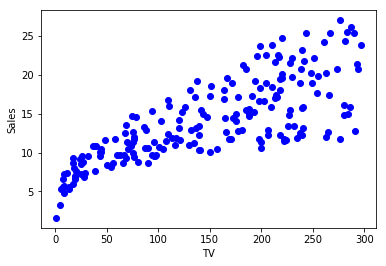

In [14]:
import matplotlib.pyplot as plt

plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(tv, sales, color='blue')
plt.show()

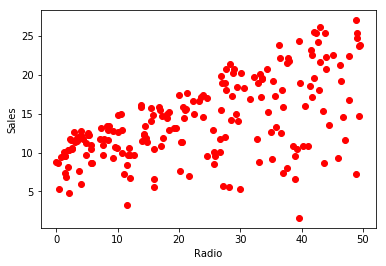

In [5]:
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.scatter(radio, sales, color='red')
plt.show()

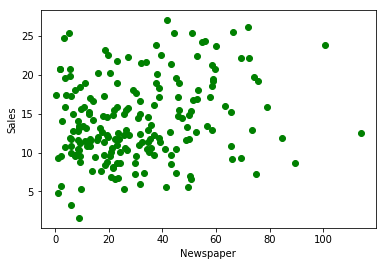

In [6]:
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.scatter(newspaper, sales, color='green')
plt.show()

Zaključujemo da je linearna zavisnost prodaje od reklamiranja na TV-u najveća, a najmanja od reklamiranja u novinama. 

In [7]:
reg = linear_model.LinearRegression()
tv_radio_newspaper = data[['TV', 'Radio', 'Newspaper']]
reg.fit(tv_radio_newspaper, sales)
print(reg.coef_)
print(reg.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594085


Dakle, formula linearne zavisnosti je $\text{Sales} = 0.04576465 \cdot \text{TV} + 0.18853002 \cdot \text{Radio} - 0.00103749 \cdot \text{Newspaper} + 2.9388893694594085.$

Ocena greške:

In [8]:
from sklearn import metrics

predicted = reg.predict(tv_radio_newspaper)
mae = metrics.mean_absolute_error(sales, predicted)
mse = metrics.mean_squared_error(sales, predicted)
r2 = reg.score(tv_radio_newspaper, sales)

print('MAE =', mae)
print('MSE =', mse)
print('R^2 =', r2)

MAE = 1.252011229687068
MSE = 2.784126314510936
R^2 = 0.8972106381789521


Kod ovakvog modeliranja, može se dogoditi da se problem previše prilagodi skupu podataka nad kojim je istreniran, pa da se lošije ponaša na nekom skupu podataka koji prethodno nije bio testiran (overfitting). Zbog toga je poželjno podeliti skup podataka na skup za treniranje i skup za testiranje. 

In [9]:
from sklearn import model_selection

# train_size predstavlja deo podataka za treniranje
# test_size predstavlja deo podataka za testiranje
# random_state se odnosi na seed
xtrain, xtest, ytrain, ytest \
= model_selection.train_test_split(tv_radio_newspaper, sales, test_size=0.33, random_state=1)
reg_train_test = linear_model.LinearRegression()
reg_train_test.fit(xtrain, ytrain)
print(reg_train_test.coef_)
print(reg_train_test.intercept_)
print('R^2:', reg_train_test.score(xtest, ytest))

[0.04574124 0.180924   0.0031418 ]
3.0191951616874455
R^2: 0.9142453857006444


Formula modela sada postaje $\text{Sales} = 0.04574124 \cdot \text{TV} + 0.180924 \cdot \text{Radio} + 0.0031418 \cdot \text{Newspaper} + 3.0191951616874455.$

Različitim podelama polaznog skupa na skup za treniranje i skup za tesiranje se dobijaju modeli u kojima figurišu drugi parametri. Potreban nam je mehanizam kojim (u opštem slučaju) možemo da upoređujemo modele sa ciljem odabira najboljeg modela. Tome nam služi **unakrsna validacija** (cross validation).

Kod unakrsne validacije se polazni skup particioniše na $k$ delova (gde je $k$ unapred izabrani parametar). Model se trenira na svih $k-1$ podskupova odjednom, a testira na preostalom podskupu. Proces se ponavlja $k$ puta, pri čemu se u svakoj iteraciji koristi drugačiji skup za testiranje.

In [10]:
reg_cross = linear_model.LinearRegression()
scores = model_selection.cross_val_score(reg_cross, tv_radio_newspaper, sales, cv = 10)
print('Svi skorovi:', scores)
print('Srednji skor:', scores.mean())

Svi skorovi: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Srednji skor: 0.8853562237979616


Postavlja se pitanje da li se, eventualno, izuzimanjem neke od veličina (TV, radio ili newspaper) dobija bolji model:

In [11]:
reg_tv_radio = linear_model.LinearRegression()
tv_radio = data[['TV', 'Radio']]
scores = model_selection.cross_val_score(reg_tv_radio, tv_radio, sales, cv = 10)
scores.mean()

0.8869670516810129

In [12]:
reg_tv_newspaper = linear_model.LinearRegression()
tv_newspaper = data[['TV', 'Newspaper']]
scores = model_selection.cross_val_score(reg_tv_newspaper, tv_newspaper, sales, cv = 10)
scores.mean()

0.6066319724531258

In [13]:
reg_radio_newspaper = linear_model.LinearRegression()
radio_newspaper = data[['Radio', 'Newspaper']]
scores = model_selection.cross_val_score(reg_radio_newspaper, radio_newspaper, sales, cv = 10)
scores.mean()

0.28965750808268553

Rezultati ukazuju na najbolje ponašanje modela koji sadrži samo veličine TV i Radio.